## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
# allow plots to appear directly in the notebook
%matplotlib inline


## **Uploading datset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving possum.csv to possum (1).csv


In [ ]:
data=pd.read_csv('/content/possum.csv')
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


## **Data Preprocessing**

**Checking Null values**

In [ ]:
data.isna().sum()

,0
case,0
site,0
Pop,0
sex,0
age,2
hdlngth,0
skullw,0
totlngth,0
taill,0
footlgth,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [ ]:
data.shape

(104, 14)

In [ ]:
data.shape[1]

14

In [ ]:
for i in range(data.shape[1]):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
case
1      1
2      1
77     1
76     1
75     1
      ..
32     1
31     1
30     1
29     1
104    1
Name: count, Length: 104, dtype: int64
[1 2 3 4 5 6 7]
site
1    33
7    18
2    13
5    13
6    13
3     7
4     7
Name: count, dtype: int64
['Vic' 'other']
Pop
other    58
Vic      46
Name: count, dtype: int64
['m' 'f']
sex
m    61
f    43
Name: count, dtype: int64
[ 8.  6.  2.  1.  9.  5.  3.  4.  7. nan]
age
3.0    27
2.0    16
4.0    14
5.0    13
6.0    12
1.0    10
7.0     7
9.0     2
8.0     1
Name: count, dtype: int64
[ 94.1  92.5  94.   93.2  91.5  93.1  95.3 

**Replacing missing values**

In [ ]:
continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns
# Replace null values in continuous columns with the mean
for column in continuous_columns:
    mean_value = data[column].mean()
    data[column].fillna(mean_value, inplace=True)

<ipython-input-398-77294f2f378d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mean_value, inplace=True)


In [ ]:
data.isna().sum()

,0
case,0
site,0
Pop,0
sex,0
age,0
hdlngth,0
skullw,0
totlngth,0
taill,0
footlgth,0


In [ ]:
df=data
df.iloc[:,4].value_counts()

,count
age,
3.000000,27
2.000000,16
4.000000,14
5.000000,13
6.000000,12
1.000000,10
7.000000,7
9.000000,2
3.833333,2


In [ ]:
print(df)

     case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0       1     1    Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1       2     1    Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2       3     1    Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3       4     1    Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4       5     1    Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
..    ...   ...    ...  ..  ...      ...     ...       ...    ...       ...   
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye  chest  belly  
0        54.5  

In [ ]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.890617,3.573349,3.113426,4.310549,1.959518,4.373917,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.750000,90.675000,54.975000,84.000000,35.875000,64.650000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.100000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


**Dropping the column 'age' and assigning it as target variable**

In [ ]:
X=df.drop(['age'],axis=1)
print(X)
y=df['age']
print(y)

     case  site    Pop sex  hdlngth  skullw  totlngth  taill  footlgth  \
0       1     1    Vic   m     94.1    60.4      89.0   36.0      74.5   
1       2     1    Vic   f     92.5    57.6      91.5   36.5      72.5   
2       3     1    Vic   f     94.0    60.0      95.5   39.0      75.4   
3       4     1    Vic   f     93.2    57.1      92.0   38.0      76.1   
4       5     1    Vic   f     91.5    56.3      85.5   36.0      71.0   
..    ...   ...    ...  ..      ...     ...       ...    ...       ...   
99    100     7  other   m     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f     93.6    59.9      89.0   40.0      67.6   

     earconch   eye  chest  belly  
0        54.5  15.2   28.0   36.0  
1        51.2  16.0   28.5   33.0  
2  

In [ ]:
X=pd.get_dummies(X,dtype='int',drop_first=True)
print(X)

     case  site  hdlngth  skullw  totlngth  taill  footlgth  earconch   eye  \
0       1     1     94.1    60.4      89.0   36.0      74.5      54.5  15.2   
1       2     1     92.5    57.6      91.5   36.5      72.5      51.2  16.0   
2       3     1     94.0    60.0      95.5   39.0      75.4      51.9  15.5   
3       4     1     93.2    57.1      92.0   38.0      76.1      52.2  15.2   
4       5     1     91.5    56.3      85.5   36.0      71.0      53.2  15.1   
..    ...   ...      ...     ...       ...    ...       ...       ...   ...   
99    100     7     89.5    56.0      81.5   36.5      66.0      46.8  14.8   
100   101     7     88.6    54.7      82.5   39.0      64.4      48.0  14.0   
101   102     7     92.4    55.0      89.0   38.0      63.5      45.4  13.0   
102   103     7     91.5    55.2      82.5   36.5      62.9      45.9  15.4   
103   104     7     93.6    59.9      89.0   40.0      67.6      46.0  14.8   

     chest  belly  Pop_other  sex_m  
0     28.0   

##**Exploratory Data Anaylsis**

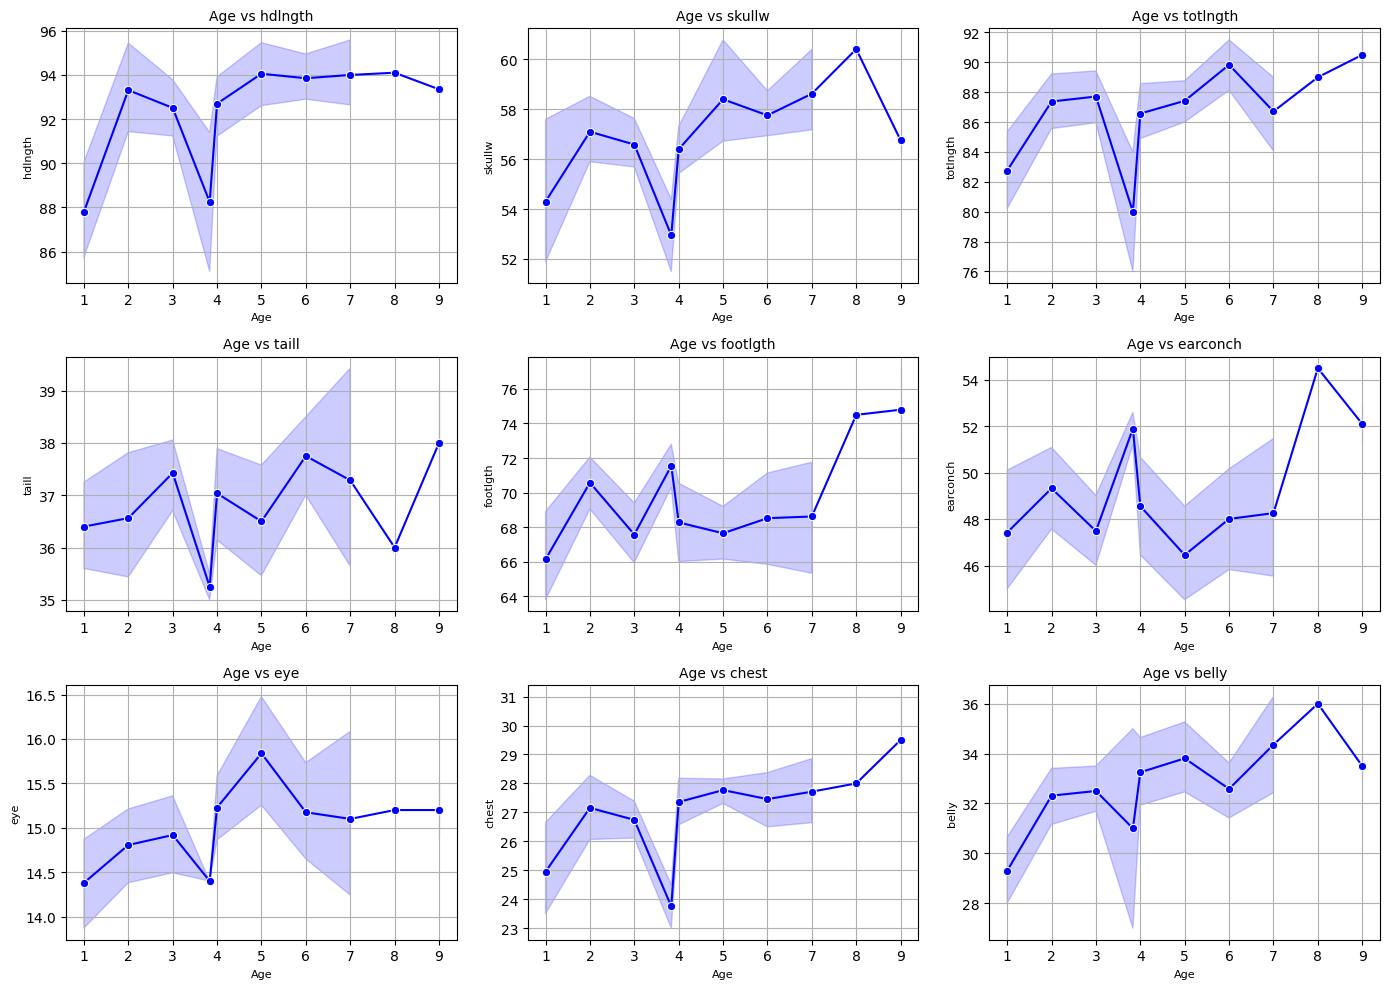

In [ ]:
continuous_attributes = ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']

# Set up figure and axes
fig, axes = plt.subplots(3, 3, figsize=(14, 10))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop through each attribute and create a line plot
for i, attribute in enumerate(continuous_attributes):
    sns.lineplot(data=df, x='age', y=attribute, ax=axes[i], marker='o', color='b')
    axes[i].set_title(f'Age vs {attribute}', fontsize=10)
    axes[i].set_xlabel('Age', fontsize=8)
    axes[i].set_ylabel(attribute, fontsize=8)
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

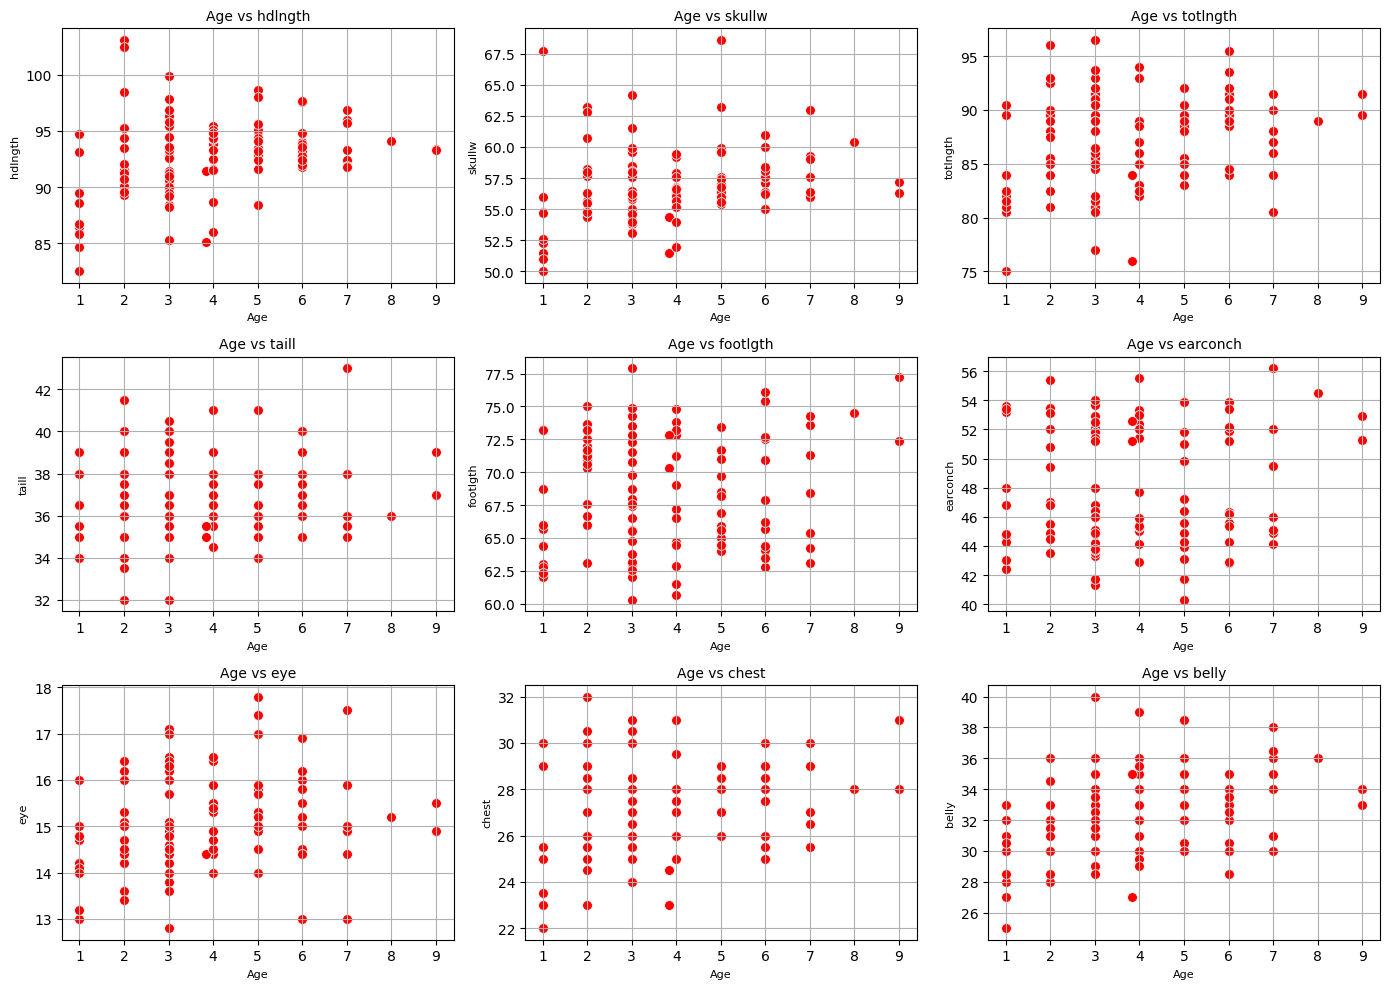

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous attributes to plot
continuous_attributes = ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']

# Set up figure and axes
fig, axes = plt.subplots(3, 3, figsize=(14, 10))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop through each attribute and create a scatter plot
for i, attribute in enumerate(continuous_attributes):
    sns.scatterplot(data=df, x='age', y=attribute, ax=axes[i], color='r', s=50, marker='o')
    axes[i].set_title(f'Age vs {attribute}', fontsize=10)
    axes[i].set_xlabel('Age', fontsize=8)
    axes[i].set_ylabel(attribute, fontsize=8)
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

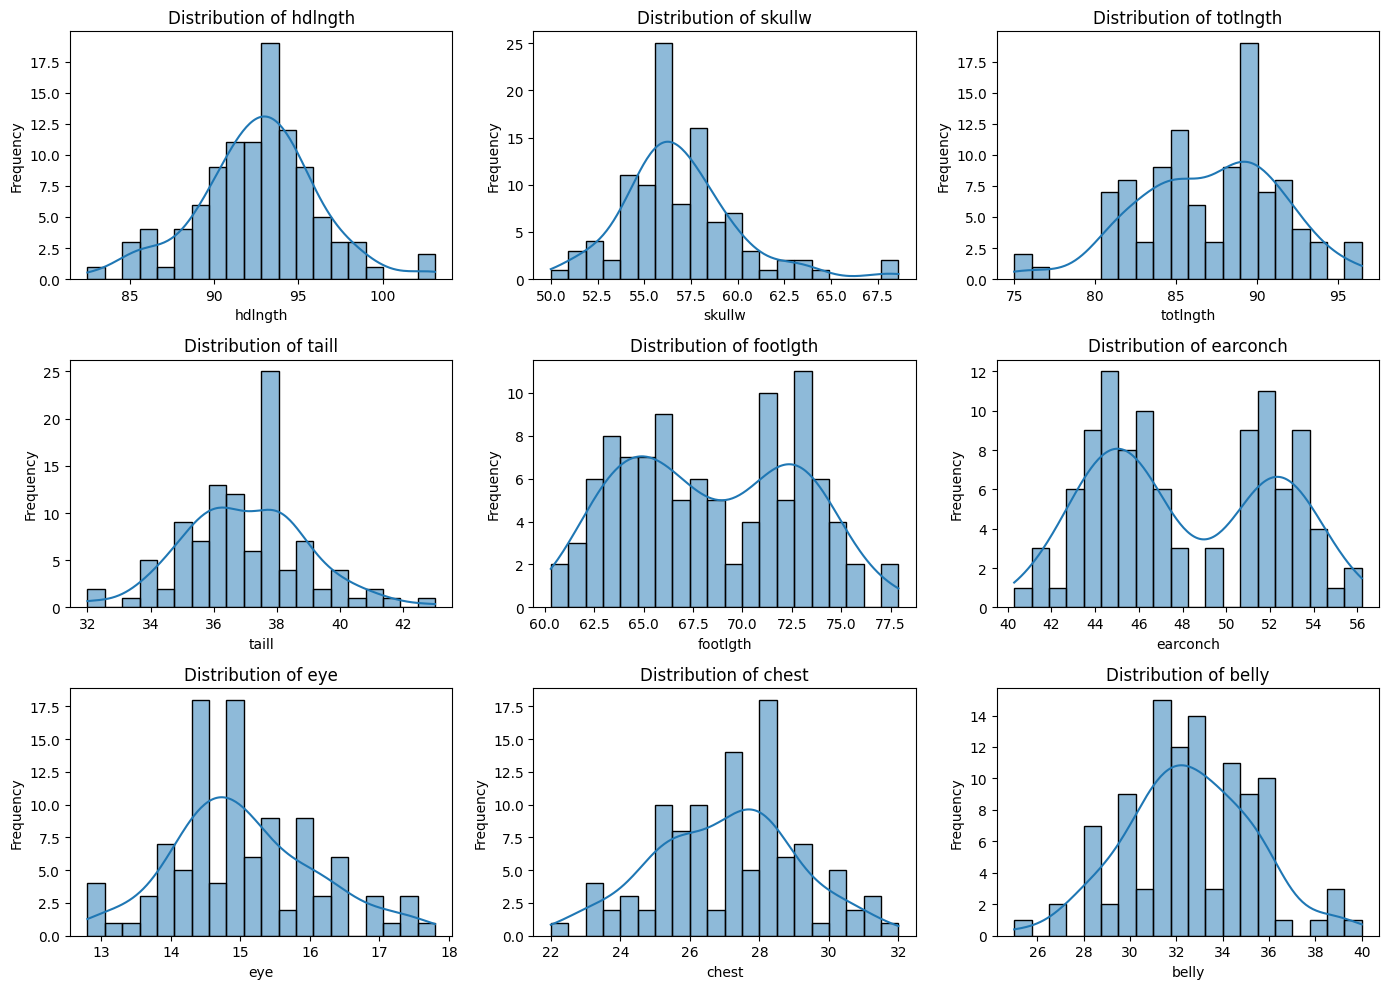

In [ ]:
plt.figure(figsize=(14, 10))

# List of continuous attributes to plot
continuous_attributes = ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']

for i, attribute in enumerate(continuous_attributes, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(df[attribute], bins=20, kde=True)  # KDE adds a density plot
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

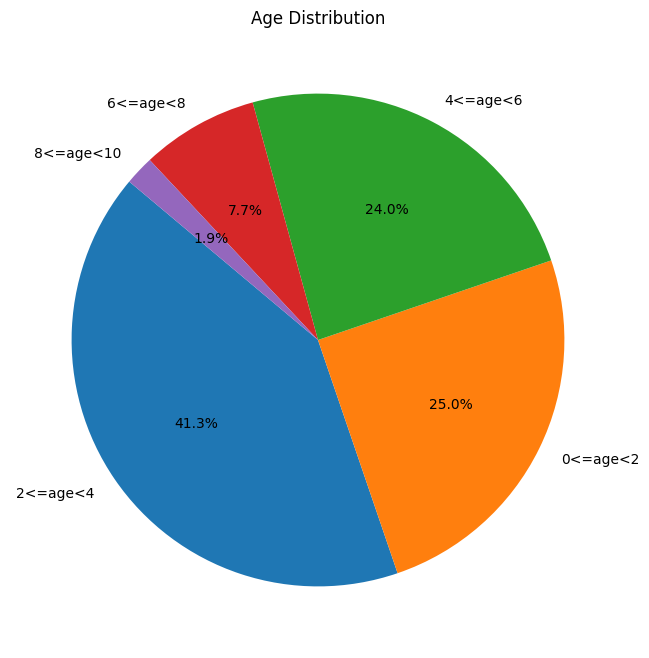

In [ ]:
#pie chart
# Define bins and labels for age categories
df=pd.DataFrame(data)
bins = [0, 2, 4, 6, 8, 10]  # Define age ranges
labels = ['0<=age<2', '2<=age<4', '4<=age<6', '6<=age<8', '8<=age<10']  # Define corresponding labels

# Bin the age data
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Count the number of occurrences in each age category
age_counts = df['age_category'].value_counts()
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution')
plt.show()

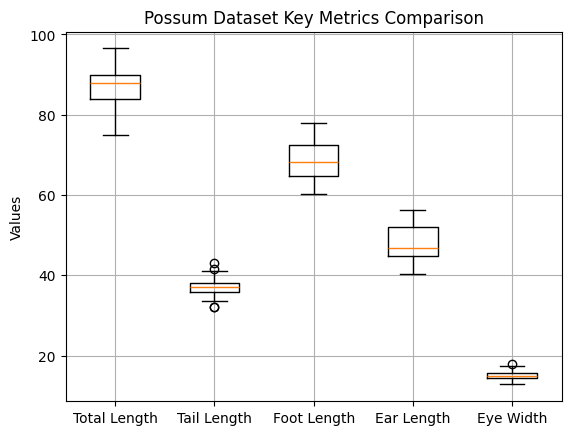

In [ ]:
data_metrics = [
    df['totlngth'],
    df['taill'],
    df['footlgth'],
    df['earconch'],
    df['eye']
]

# Create a box plot
plt.boxplot(data_metrics, labels=['Total Length', 'Tail Length', 'Foot Length', 'Ear Length', 'Eye Width'])

# Customize the plot
plt.ylabel('Values')
plt.title('Possum Dataset Key Metrics Comparison')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
c=data.select_dtypes(include="number").corr()
c

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.970353,-0.194404,-0.209177,-0.125065,-0.334329,0.315351,-0.781811,-0.773727,-0.084078,-0.402303,-0.211671
site,0.970353,1.000000,-0.130799,-0.163646,-0.083548,-0.260843,0.380444,-0.781171,-0.790716,-0.036987,-0.345494,-0.175266
age,-0.194404,-0.130799,1.000000,0.311848,0.279955,0.250970,0.117274,0.125314,0.052943,0.234669,0.325303,0.345825
hdlngth,-0.209177,-0.163646,0.311848,1.000000,0.710827,0.691094,0.287429,0.388941,0.121463,0.347175,0.631498,0.562663
skullw,-0.125065,-0.083548,0.279955,0.710827,1.000000,0.526413,0.255921,0.275057,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.334329,-0.260843,0.250970,0.691094,0.526413,1.000000,0.565646,0.442866,0.154484,0.247786,0.577890,0.519465
taill,0.315351,0.380444,0.117274,0.287429,0.255921,0.565646,1.000000,-0.126235,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.781811,-0.781171,0.125314,0.388941,0.275057,0.442866,-0.126235,1.000000,0.768986,0.005197,0.450590,0.301736
earconch,-0.773727,-0.790716,0.052943,0.121463,-0.000537,0.154484,-0.385136,0.768986,1.000000,-0.165092,0.199230,0.066527
eye,-0.084078,-0.036987,0.234669,0.347175,0.321991,0.247786,0.198134,0.005197,-0.165092,1.000000,0.149338,0.235716


<Axes: >

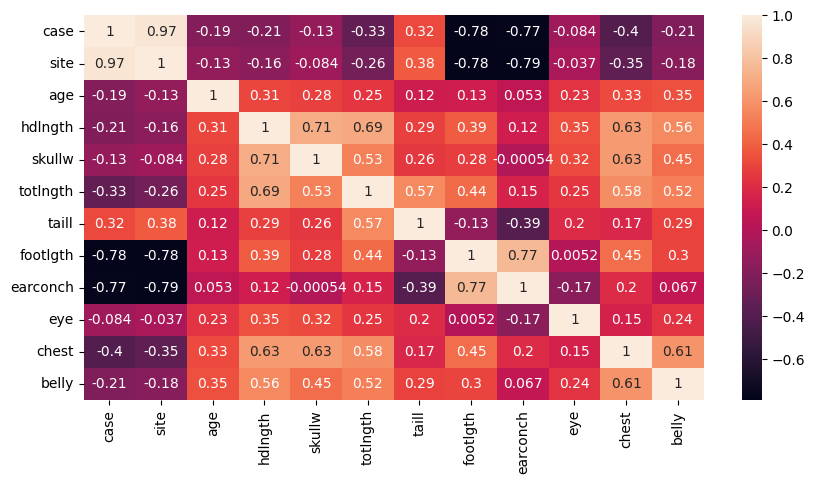

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(c,annot=True)

# LINEAR REGRESSION

In [ ]:
### SCIKIT-LEARN ###
#multiple regression
# create X and y
feature_cols = ['case','site','hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
X = data[feature_cols]
y = data.age

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

-5.20235066804844
[-0.05649674  0.5077668   0.0796396   0.04261819 -0.06877445  0.08789572
 -0.0889329   0.01835949  0.13979907  0.05951186  0.14094195]


In [ ]:
X = data[['case','site','hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]
y = data.age
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.5766374109418095


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.40, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.25, random_state=42)
X_train4 ,X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.20, random_state=42)

60-40

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train1, y_train1)
y_pred1 = lm2.predict(X_test1)
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

1.9554976116609568


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.07229324223784206

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

1.5306105922714177

70-30

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train2, y_train2)
y_pred2 = lm2.predict(X_test2)
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

1.7967786273154511


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.15019791292114404

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

1.3453592668637255

75-25

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train3, y_train3)
y_pred3 = lm2.predict(X_test3)
print(np.sqrt(metrics.mean_squared_error(y_test3, y_pred)))

2.2354642065712467


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.1481084912232412

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

1.4495429340799098

80-20

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train4, y_train4)
y_pred4 = lm2.predict(X_test4)
print(np.sqrt(metrics.mean_squared_error(y_test4, y_pred4)))

2.0067657001283377


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.10420927338369401

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

1.525427796471543

# VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert to numeric and handle errors
X_numeric = X.apply(pd.to_numeric, errors='coerce')

# Drop columns that could not be converted
X_numeric = X_numeric.dropna(axis=1)

def calc_vif(X):
    # Select only numeric columns for VIF calculation
    numeric_X = X.select_dtypes(include=['number'])

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = numeric_X.columns
    vif["VIF"] = [variance_inflation_factor(numeric_X.values, i).round(1) for i in range(numeric_X.shape[1])]

    return(vif)

# Calculate VIF
calc_vif(X_numeric)

,variables,VIF
0,case,78.6
1,site,71.3
2,hdlngth,2345.8
3,skullw,829.6
4,totlngth,1834.1
5,taill,1020.5
6,footlgth,1046.1
7,earconch,418.8
8,eye,260.2
9,chest,486.5


In [ ]:
calc_vif(X_numeric.drop('hdlngth', axis=1))

,variables,VIF
0,case,75.3
1,site,71.3
2,skullw,717.6
3,totlngth,1435.3
4,taill,968.3
5,footlgth,1014.9
6,earconch,390.8
7,eye,225.9
8,chest,469.5
9,belly,248.8


In [ ]:
calc_vif(X_numeric.drop(['hdlngth','totlngth'], axis=1))

,variables,VIF
0,case,73.0
1,site,71.0
2,skullw,675.3
3,taill,516.6
4,footlgth,991.7
5,earconch,389.9
6,eye,225.5
7,chest,460.9
8,belly,245.8


In [ ]:
calc_vif(X_numeric.drop(['hdlngth','totlngth','footlgth'], axis=1))

,variables,VIF
0,case,72.6
1,site,68.1
2,skullw,639.0
3,taill,451.4
4,earconch,184.1
5,eye,225.2
6,chest,455.1
7,belly,244.7


In [ ]:
calc_vif(X_numeric.drop(['hdlngth','totlngth','footlgth','skullw'], axis=1))

,variables,VIF
0,case,71.4
1,site,68.1
2,taill,443.9
3,earconch,172.3
4,eye,192.1
5,chest,307.7
6,belly,244.5


In [ ]:
calc_vif(X_numeric.drop(['hdlngth','totlngth','footlgth','skullw','taill'], axis=1))

,variables,VIF
0,case,71.4
1,site,64.8
2,earconch,140.4
3,eye,162.3
4,chest,284.2
5,belly,231.8


In [ ]:
calc_vif(X_numeric.drop(['hdlngth','totlngth','footlgth','skullw','taill','chest'], axis=1))

,variables,VIF
0,case,69.8
1,site,63.4
2,earconch,119.9
3,eye,154.4
4,belly,139.1


In [ ]:
calc_vif(X_numeric.drop(['hdlngth','totlngth','footlgth','skullw','taill','chest','belly'], axis=1))

,variables,VIF
0,case,69.6
1,site,62.7
2,earconch,95.3
3,eye,111.2


In [ ]:
calc_vif(X_numeric.drop(['hdlngth','totlngth','footlgth','skullw','taill','chest','belly','eye'], axis=1))

,variables,VIF
0,case,69.0
1,site,59.2
2,earconch,3.6


In [ ]:
calc_vif(X_numeric.drop(['hdlngth','totlngth','footlgth','skullw','taill','chest','belly','eye','case'], axis=1))

,variables,VIF
0,site,2.8
1,earconch,2.8


The test for multicollinearity is not suitable for this dataset since all the variables are highly correlated to each other

# KNN

60-40

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model=KNeighborsRegressor(n_neighbors=25)

In [ ]:
model.fit(X_train1, y_train1)

KNeighborsRegressor(n_neighbors=25)

In [ ]:
y_pred1 = model.predict(X_test1)

In [ ]:
y_pred1

array([3.87333333, 4.04      , 4.        , 4.2       , 3.63333333,
       3.72      , 3.72      , 3.87333333, 3.95333333, 3.95333333,
       3.95333333, 3.96      , 3.72      , 3.72      , 3.64      ,
       3.95333333, 3.8       , 3.83333333, 3.95333333, 3.83333333,
       3.72      , 4.2       , 3.95333333, 3.76      , 3.63333333,
       3.8       , 3.95333333, 3.63333333, 3.59333333, 3.95333333,
       3.72      , 3.95333333, 3.72      , 3.64      , 3.83333333,
       3.44      , 3.95333333, 4.        , 4.12      , 3.59333333,
       3.55333333, 3.96      ])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
knn

,Predicted,Actual
30,3.873333,3.000000
65,4.040000,3.000000
64,4.000000,5.000000
53,4.200000,7.000000
45,3.633333,3.833333
93,3.720000,7.000000
91,3.720000,2.000000
47,3.873333,5.000000
10,3.953333,9.000000
0,3.953333,8.000000


Evaluation Metrics

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.03705047581572496

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

1.6222222222222225

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

3.9692402116402112

In [ ]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

1.9922952119704076

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test1, y_pred1)
print(mape)
mape = mape * 100
mape

0.6906330775466386


69.06330775466387

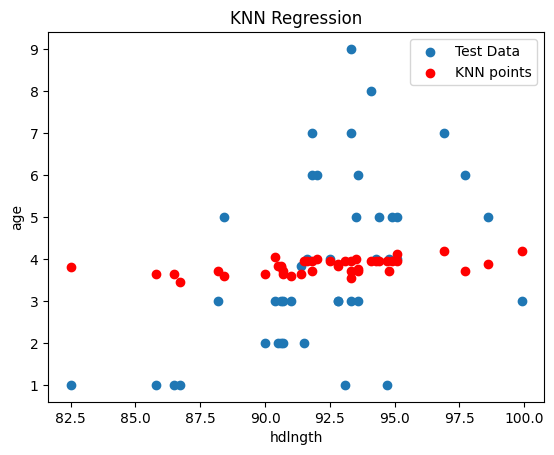

In [ ]:
plt.scatter(X_test1['hdlngth'], y_test1, label='Test Data')
plt.scatter(X_test1['hdlngth'], y_pred1, color='red', linewidth=1, label='KNN points')
plt.xlabel('hdlngth')
plt.ylabel('age')
plt.title('KNN Regression')
plt.legend()
plt.show()

70-30

In [ ]:
model.fit(X_train2, y_train2)

KNeighborsRegressor(n_neighbors=25)

In [ ]:
y_pred2 = model.predict(X_test2)

In [ ]:
y_pred2

array([3.68      , 4.12      , 4.04      , 4.44      , 3.79333333,
       3.36      , 3.36      , 3.88      , 4.04      , 4.04      ,
       3.88      , 3.88      , 3.52      , 3.36      , 3.6       ,
       4.04      , 3.6       , 3.47333333, 4.04      , 3.71333333,
       3.36      , 4.48      , 3.92      , 3.68      , 3.95333333,
       3.76      , 4.04      , 3.83333333, 3.67333333, 4.04      ,
       3.44      , 4.04      ])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
knn

,Predicted,Actual
30,3.680000,3.000000
65,4.120000,3.000000
64,4.040000,5.000000
53,4.440000,7.000000
45,3.793333,3.833333
93,3.360000,7.000000
91,3.360000,2.000000
47,3.880000,5.000000
10,4.040000,9.000000
0,4.040000,8.000000


Evaluation Metrics

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.035248863595792934

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

1.5206250000000001

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)

3.665106944444444

In [ ]:
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
rmse

1.9144469030099645

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test2, y_pred2)
print(mape)
mape = mape * 100
mape

0.5008136861628709


50.081368616287094

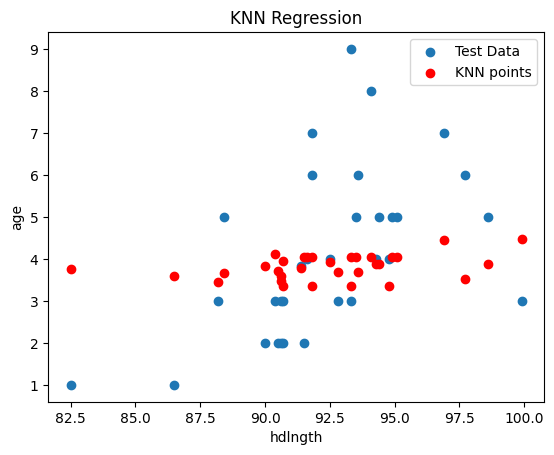

In [ ]:
plt.scatter(X_test2['hdlngth'], y_test2, label='Test Data')
plt.scatter(X_test2['hdlngth'], y_pred2, color='red', linewidth=1, label='KNN points')
plt.xlabel('hdlngth')
plt.ylabel('age')
plt.title('KNN Regression')
plt.legend()
plt.show()

75-25

In [ ]:
model.fit(X_train3, y_train3)

KNeighborsRegressor(n_neighbors=25)

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3

array([3.64      , 4.12      , 4.04      , 4.28      , 3.71333333,
       3.44      , 3.2       , 3.88      , 4.        , 4.        ,
       4.        , 3.6       , 3.44      , 3.44      , 3.6       ,
       4.        , 3.48      , 3.63333333, 4.        , 3.67333333,
       3.44      , 4.2       , 3.76      , 3.72      , 3.79333333,
       3.76      ])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
knn

,Predicted,Actual
30,3.640000,3.000000
65,4.120000,3.000000
64,4.040000,5.000000
53,4.280000,7.000000
45,3.713333,3.833333
93,3.440000,7.000000
91,3.200000,2.000000
47,3.880000,5.000000
10,4.000000,9.000000
0,4.000000,8.000000


Evaluation metrics

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.03369445639902369

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

1.617692307692308

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)

4.114938461538461

In [ ]:
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
rmse

2.028531109334649

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test3, y_pred3)
print(mape)
mape = mape * 100
mape

0.5414530976270107


54.14530976270107

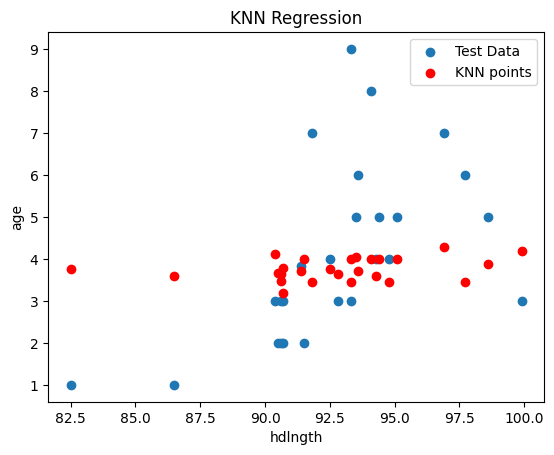

In [ ]:
plt.scatter(X_test3['hdlngth'], y_test3, label='Test Data')
plt.scatter(X_test3['hdlngth'], y_pred3, color='red', linewidth=1, label='KNN points')
plt.xlabel('hdlngth')
plt.ylabel('age')
plt.title('KNN Regression')
plt.legend()
plt.show()

80-20

In [ ]:
model.fit(X_train4, y_train4)

KNeighborsRegressor(n_neighbors=25)

In [ ]:
y_pred4 = model.predict(X_test4)
y_pred4

array([3.68      , 4.        , 4.28      , 4.2       , 3.59333333,
       3.4       , 3.2       , 3.84      , 4.        , 4.        ,
       3.92      , 3.52      , 3.4       , 3.4       , 3.68      ,
       4.        , 3.52      , 3.51333333, 4.        , 3.68      ,
       3.4       ])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
knn

,Predicted,Actual
30,3.680000,3.000000
65,4.000000,3.000000
64,4.280000,5.000000
53,4.200000,7.000000
45,3.593333,3.833333
93,3.400000,7.000000
91,3.200000,2.000000
47,3.840000,5.000000
10,4.000000,9.000000
0,4.000000,8.000000


Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.01632530404080046

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

1.6644444444444444

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)

4.422198941798943

In [ ]:
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
rmse

2.1029025041116247

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test4, y_pred4)
print(mape)
mape = mape * 100
mape

0.4891007920076242


48.91007920076242

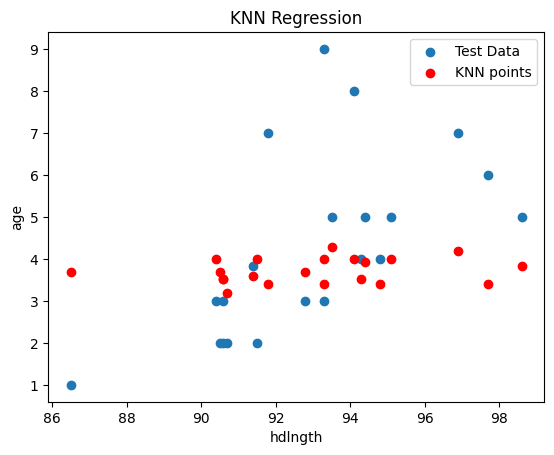

In [ ]:
plt.scatter(X_test4['hdlngth'], y_test4, label='Test Data')
plt.scatter(X_test4['hdlngth'], y_pred4, color='red', linewidth=1, label='KNN points')
plt.xlabel('hdlngth')
plt.ylabel('age')
plt.title('KNN Regression')
plt.legend()
plt.show()

# **SVM**

60-40

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='linear')

In [ ]:
model.fit(X_train1, y_train1)

SVR(kernel='linear')

In [ ]:
y_pred1 = model.predict(X_test1)
y_pred1

array([3.78349348, 4.41898078, 3.66060923, 5.09121879, 0.86563047,
       3.10057874, 1.95960846, 4.06685823, 4.37329096, 5.52784653,
       3.42793154, 2.29967115, 3.92479408, 2.55413257, 3.09316111,
       6.03890767, 3.35093645, 2.57073635, 4.88493594, 2.38128164,
       2.84346003, 4.08931164, 3.38687573, 4.16790598, 1.75766679,
       1.81515822, 3.53821012, 1.1654959 , 2.66874514, 5.56223427,
       3.991962  , 4.67050832, 1.96700702, 2.83582736, 1.03266035,
       3.6287386 , 5.15237627, 4.71475792, 5.29207748, 1.97820386,
       1.76123744, 4.38749148])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
svm

,Predicted,Actual
30,3.783493,3.000000
65,4.418981,3.000000
64,3.660609,5.000000
53,5.091219,7.000000
45,0.865630,3.833333
93,3.100579,7.000000
91,1.959608,2.000000
47,4.066858,5.000000
10,4.373291,9.000000
0,5.527847,8.000000


Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

-0.06314668941209689

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

1.659802340961623

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

4.382249001121187

In [ ]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

2.093382191841993

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test1, y_pred1)
print(mape)
mape = mape * 100
mape

0.666993862937131


66.6993862937131

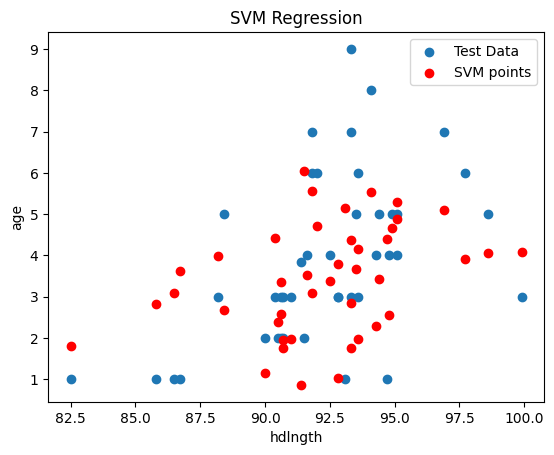

In [ ]:
plt.scatter(X_test1['hdlngth'], y_test1, label='Test Data')
plt.scatter(X_test1['hdlngth'], y_pred1, color='red', linewidth=1, label='SVM points')
plt.xlabel('hdlngth')
plt.ylabel('age')
plt.title('SVM Regression')
plt.legend()
plt.show()

70-30

In [ ]:
model.fit(X_train2, y_train2)

SVR(kernel='linear')

In [ ]:
y_pred2 = model.predict(X_test2)

In [ ]:
y_pred2

array([3.11871122, 4.09621622, 3.53554449, 4.87880444, 2.5631878 ,
       3.22993915, 2.90144155, 4.91783656, 3.17044441, 4.73389861,
       3.26707856, 2.78246758, 3.66881586, 3.37773914, 2.72744047,
       4.21766766, 3.81041819, 2.63700366, 4.47755464, 2.89102969,
       3.078971  , 4.56303268, 3.38363451, 4.65068665, 2.42717047,
       2.49544604, 3.05510735, 1.58493848, 2.88751294, 4.05800901,
       3.05137836, 3.91950784])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
svm

,Predicted,Actual
30,3.118711,3.000000
65,4.096216,3.000000
64,3.535544,5.000000
53,4.878804,7.000000
45,2.563188,3.833333
93,3.229939,7.000000
91,2.901442,2.000000
47,4.917837,5.000000
10,3.170444,9.000000
0,4.733899,8.000000


Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.11836554718926973

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

1.401631611173635

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)

3.3493451663624225

In [ ]:
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
rmse

1.8301216261118884

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test2, y_pred2)
print(mape)
mape = mape * 100
mape

0.39374332228453807


39.37433222845381

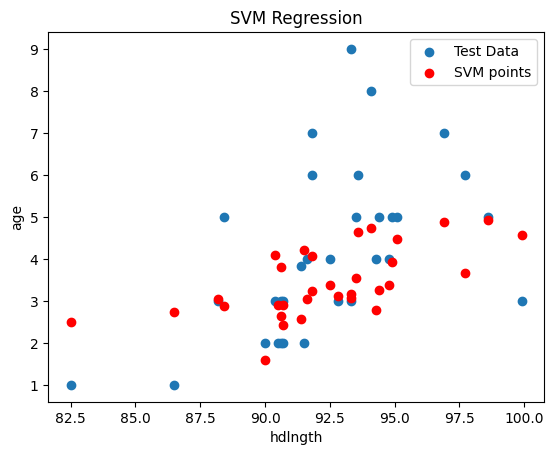

In [ ]:
plt.scatter(X_test2['hdlngth'], y_test2, label='Test Data')
plt.scatter(X_test2['hdlngth'], y_pred2, color='red', linewidth=1, label='SVM points')
plt.xlabel('hdlngth')
plt.ylabel('age')
plt.title('SVM Regression')
plt.legend()
plt.show()

75-25

In [ ]:
model.fit(X_train3, y_train3)

SVR(kernel='linear')

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3

array([3.08873256, 4.43664645, 3.92001978, 5.02047132, 2.31306545,
       3.09786296, 2.97858436, 5.0093457 , 4.11278419, 5.93831557,
       3.76411493, 2.79470089, 3.42934296, 2.63062463, 3.05774988,
       5.2247455 , 4.02472779, 3.07866171, 5.38477836, 3.29401261,
       2.57487122, 4.71172591, 3.69504721, 4.66356117, 2.18732117,
       3.14675903])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
svm

,Predicted,Actual
30,3.088733,3.000000
65,4.436646,3.000000
64,3.920020,5.000000
53,5.020471,7.000000
45,2.313065,3.833333
93,3.097863,7.000000
91,2.978584,2.000000
47,5.009346,5.000000
10,4.112784,9.000000
0,5.938316,8.000000


Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.14938179874583535

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

1.5433730678304218

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)

3.6222927371208438

In [ ]:
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
rmse

1.903232181611283

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test3, y_pred3)
print(mape)
mape = mape * 100
mape

0.5106298421746956


51.06298421746956

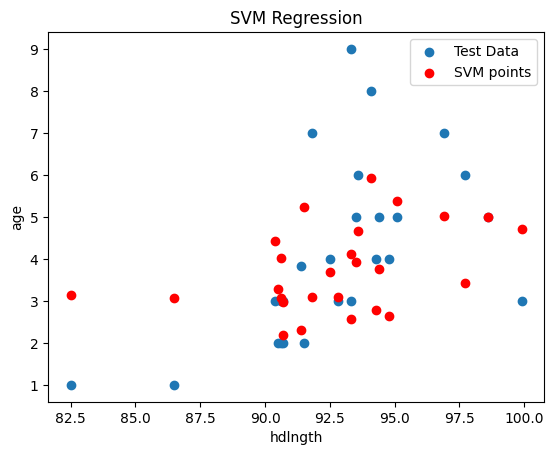

In [ ]:
plt.scatter(X_test3['hdlngth'], y_test3, label='Test Data')
plt.scatter(X_test3['hdlngth'], y_pred3, color='red', linewidth=1, label='SVM points')
plt.xlabel('hdlngth')
plt.ylabel('age')
plt.title('SVM Regression')
plt.legend()
plt.show()

80-20

In [ ]:
model.fit(X_train4, y_train4)

SVR(kernel='linear')

In [ ]:
y_pred4 = model.predict(X_test4)

In [ ]:
y_pred4

array([3.38719849, 4.47102534, 3.89563936, 4.72472728, 2.49722217,
       3.270458  , 2.96325985, 4.9325895 , 4.0030585 , 5.6557222 ,
       3.9936424 , 2.95234456, 3.58250119, 2.70051689, 2.97258929,
       5.10278939, 4.09521572, 3.00065763, 5.15782617, 3.19878414,
       2.73973826])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
svm

,Predicted,Actual
30,3.387198,3.000000
65,4.471025,3.000000
64,3.895639,5.000000
53,4.724727,7.000000
45,2.497222,3.833333
93,3.270458,7.000000
91,2.963260,2.000000
47,4.932590,5.000000
10,4.003059,9.000000
0,5.655722,8.000000


Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.12406538177948545

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

1.5825961446790922

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)

3.9378436364093337

In [ ]:
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
rmse

1.9844000696455677

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test4, y_pred4)
print(mape)
mape = mape * 100
mape

0.4613377383442457


46.13377383442457

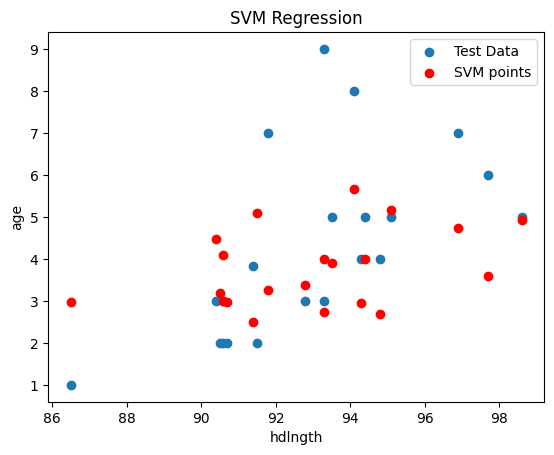

In [ ]:
plt.scatter(X_test4['hdlngth'], y_test4, label='Test Data')
plt.scatter(X_test4['hdlngth'], y_pred4, color='red', linewidth=1, label='SVM points')
plt.xlabel('hdlngth')
plt.ylabel('age')
plt.title('SVM Regression')
plt.legend()
plt.show()

Decision_Trees

60-40

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg = DecisionTreeRegressor()
reg = reg.fit(X_train1,y_train1)

In [ ]:
y_pred1 = reg.predict(X_test1)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

-0.4865850909799396

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

1.9484126984126986

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

6.127645502645502

In [ ]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

2.4754081486990187

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test1, y_pred1)
print(mape)
mape = mape * 100
mape

0.7480651680962239


74.8065168096224

70-30

In [ ]:
reg = DecisionTreeRegressor()
reg = reg.fit(X_train2,y_train2)

In [ ]:
y_pred2 = reg.predict(X_test2)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.08944854227509336

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

1.3385416666666667

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)

3.459201388888889

In [ ]:
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
rmse

1.8598928433888036

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test2, y_pred2)
print(mape)
mape = mape * 100
mape

0.31773097826086955


31.773097826086953

75-25

In [ ]:
reg = DecisionTreeRegressor()
reg= reg.fit(X_train3,y_train3)

In [ ]:
y_pred3 = reg.predict(X_test3)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.162795634595158

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

1.3397435897435899

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)

3.56517094017094

In [ ]:
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
rmse

1.888166025584334

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test3, y_pred3)
print(mape)
mape = mape * 100
mape

0.31477146042363435


31.477146042363437

80-20

In [ ]:
reg= DecisionTreeRegressor()
reg = reg.fit(X_train4,y_train4)

In [ ]:
y_pred4 = reg.predict(X_test4)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

-0.47293056100431485

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

1.888888888888889

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)

6.621693121693121

In [ ]:
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
rmse

2.5732650702353075

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test4, y_pred4)
print(mape)
mape = mape * 100
mape

0.5202159124519373


52.02159124519373

# RANDOM FOREST

60-40

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

In [ ]:
rf=RandomForestRegressor()

In [ ]:
rf.fit(X_train1,y_train1)

RandomForestRegressor()

In [ ]:
y_pred1=rf.predict(X_test1)
y_pred1


array([4.045     , 3.3       , 4.62      , 3.34      , 2.51      ,
       4.37      , 2.60666667, 4.19      , 5.24      , 5.37      ,
       3.18      , 3.97      , 4.17      , 3.44      , 2.705     ,
       5.95833333, 3.76      , 2.715     , 3.99      , 2.40833333,
       4.92      , 3.5       , 4.73      , 4.29      , 3.185     ,
       2.66166667, 3.93      , 2.86666667, 3.29      , 4.92      ,
       3.18      , 4.12      , 4.48      , 2.88      , 3.255     ,
       2.945     , 3.83      , 4.28      , 3.56      , 2.875     ,
       3.69666667, 3.79      ])

Evaluation metrics

In [ ]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))
print("R2 score:",metrics.r2_score(y_test1,y_pred1))

RMSE: 1.749715812147911
R2 score: 0.2572696452107073


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

3.061505423280424

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

1.888888888888889

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test4, y_pred4)
print(mape)
mape = mape * 100
mape

0.5202159124519373


52.02159124519373

70-30

In [ ]:
rf.fit(X_train2,y_train2)
y_pred2=rf.predict(X_test2)
y_pred2

array([3.26333333, 3.57      , 4.55      , 3.07      , 2.68333333,
       4.23      , 2.62      , 4.1       , 4.73      , 5.1       ,
       3.48      , 4.22      , 3.97      , 3.77      , 2.17333333,
       5.70833333, 3.58      , 2.48666667, 4.06      , 2.28166667,
       4.62      , 3.55      , 4.83      , 4.4       , 3.09333333,
       2.25      , 3.77      , 3.00666667, 3.38      , 4.23      ,
       3.02      , 4.44      ])

In [ ]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print("R2 score:",metrics.r2_score(y_test2,y_pred2))

RMSE: 1.6859359521411905
R2 score: 0.2518119088591687


In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

1.2544791666666666

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)

2.8423800347222223

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test2, y_pred2)
print(mape)
mape = mape * 100
mape

0.3524002976190476


35.240029761904765

75-25

In [ ]:
rf.fit(X_train3,y_train3)
y_pred3=rf.predict(X_test3)
y_pred3

array([3.18166667, 3.48      , 4.54      , 3.21      , 2.60333333,
       4.54833333, 2.90833333, 3.96      , 4.76      , 5.36      ,
       3.15      , 4.1       , 3.89833333, 3.82      , 2.05833333,
       6.25      , 3.51      , 2.76166667, 4.29      , 2.17666667,
       4.9       , 3.41      , 4.57      , 4.56      , 2.94166667,
       2.31333333])

In [ ]:
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test3,y_pred3)))
print("R2 score:",metrics.r2_score(y_test3,y_pred3))

RMSE 1.8140626773725042
R2 score: 0.22722030434321105


In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

1.3389102564102562

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)

3.290823397435898

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test3, y_pred3)
print(mape)
mape = mape * 100
mape

0.393400966183575


39.3400966183575

80-20

In [ ]:
rf.fit(X_train4,y_train4)
y_pred4=rf.predict(X_test4)
y_pred4

array([3.00666667, 3.4       , 4.84      , 3.17      , 2.81833333,
       4.54      , 2.64      , 3.89      , 5.04      , 5.6       ,
       3.36      , 4.01      , 3.75      , 4.18      , 2.17166667,
       6.03833333, 3.6       , 2.73166667, 4.45      , 2.48666667,
       4.93      ])

In [ ]:
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test4,y_pred4)))
print("R2 score:",metrics.r2_score(y_test4,y_pred4))

RMSE 1.897928556145569
R2 score: 0.1987409572381329


In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)


1.408095238095238

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)

3.602132804232804

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test4, y_pred4)
print(mape)
mape = mape * 100
mape

0.38651156791218905


38.6511567912189

BOOSTING
# XGboost

In [ ]:
import xgboost as xgb

60-40

In [ ]:
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train1, y_train1)
train_model2 = model2.fit(X_train1, y_train1)

In [ ]:
pred1 = train_model1.predict(X_test1)
pred2 = train_model2.predict(X_test1)

EVALUATION METRICS

In [ ]:
print("RMSE1:",np.sqrt(metrics.mean_squared_error(y_test1, pred1)))
print("RMSE2:",np.sqrt(metrics.mean_squared_error(y_test1, pred2)))
print("R2 score1:",metrics.r2_score(y_test1,pred1))
print("R2 score2:",metrics.r2_score(y_test1,pred2))

RMSE1: 1.7318548517013523
RMSE2: 1.9981763626516869
R2 score1: 0.2723557167707735
R2 score2: 0.03135693198142453


In [ ]:
mae1=metrics.mean_absolute_error(y_test1,pred1)
mae2=metrics.mean_absolute_error(y_test1,pred2)
print("MAE1:",mae1)
print("MAE2:",mae2)

MAE1: 1.398267458355616
MAE2: 1.614214660629394


In [ ]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_test1,pred1)
mse2=mean_squared_error(y_test1,pred2)
print("MSE1:",mse1)
print("MSE2:",mse2)

MSE1: 2.9993212273615133
MSE2: 3.992708776259925


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape1 = mean_absolute_percentage_error(y_test1,pred1)
mape2= mean_absolute_percentage_error(y_test1,pred2)
mape1 = mape1 * 100
print(mape1)
mape2= mape2 * 100
print(mape2)

52.61467504937766
63.324325341055385


70-30

In [ ]:
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train2, y_train2)
train_model2 = model2.fit(X_train2, y_train2)

In [ ]:
pred1 = train_model1.predict(X_test2)
pred2 = train_model2.predict(X_test2)

In [ ]:
print("RMSE1:",np.sqrt(metrics.mean_squared_error(y_test2, pred1)))
print("RMSE2:",np.sqrt(metrics.mean_squared_error(y_test2, pred2)))
print("R2 score1:",metrics.r2_score(y_test2,pred1))
print("R2 score2:",metrics.r2_score(y_test2,pred2))

RMSE1: 1.712156219975567
RMSE2: 1.6990994520534535
R2 score1: 0.22835877265560778
R2 score2: 0.2400828480588295


In [ ]:
mae1=metrics.mean_absolute_error(y_test2,pred1)
mae2=metrics.mean_absolute_error(y_test2,pred2)
print("MAE1:",mae1)
print("MAE2:",mae2)

MAE1: 1.258042215059201
MAE2: 1.2505147426078718


In [ ]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_test2,pred1)
mse2=mean_squared_error(y_test2,pred2)
print("MSE1:",mse1)
print("MSE2:",mse2)

MSE1: 2.9314789216010224
MSE2: 2.886938947968346


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape1 = mean_absolute_percentage_error(y_test2,pred1)
mape2= mean_absolute_percentage_error(y_test2,pred2)
mape1 = mape1 * 100
print(mape1)
mape2= mape2 * 100
print(mape2)

31.151204212646466
30.809974454142786


75-25

In [ ]:
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train3, y_train3)
train_model2 = model2.fit(X_train3, y_train3)

In [ ]:
pred1 = train_model1.predict(X_test3)
pred2 = train_model2.predict(X_test3)

In [ ]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test3, pred1)))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test3, pred2)))
print("R2 score:",metrics.r2_score(y_test3,pred1))
print("R2 score:",metrics.r2_score(y_test3,pred2))

RMSE: 1.9363793824283357
RMSE: 1.946949661370283
R2 score: 0.11949459551967001
R2 score: 0.10985537834058312


In [ ]:
mae1=metrics.mean_absolute_error(y_test3,pred1)
mae2=metrics.mean_absolute_error(y_test3,pred2)
print("MAE1:",mae1)
print("MAE2:",mae2)

MAE1: 1.4035073044972544
MAE2: 1.462236531269856


In [ ]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_test3,pred1)
mse2=mean_squared_error(y_test3,pred2)
print("MSE1:",mse1)
print("MSE2:",mse2)

MSE1: 3.7495651126935425
MSE2: 3.79061298390986


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape1 = mean_absolute_percentage_error(y_test3,pred1)
mape2= mean_absolute_percentage_error(y_test3,pred2)
mape1 = mape1 * 100
print(mape1)
mape2= mape2 * 100
print(mape2)

37.599718003552226
38.17969956117407


80-20

In [ ]:
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train4, y_train4)
train_model2 = model2.fit(X_train4, y_train4)

In [ ]:
pred1 = train_model1.predict(X_test4)
pred2 = train_model2.predict(X_test4)

In [ ]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test4, pred1)))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test4, pred2)))
print("R2 score:",metrics.r2_score(y_test4,pred1))
print("R2 score:",metrics.r2_score(y_test4,pred2))

RMSE: 2.2172355621169446
RMSE: 2.049729805122611
R2 score: -0.0935455927808535
R2 score: 0.06544157733914402


In [ ]:
mae1=metrics.mean_absolute_error(y_test4,pred1)
mae2=metrics.mean_absolute_error(y_test4,pred2)
print("MAE1:",mae1)
print("MAE2:",mae2)

MAE1: 1.5304261427077037
MAE2: 1.4983937948469133


In [ ]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_test4,pred1)
mse2=mean_squared_error(y_test4,pred2)
print("MSE1:",mse1)
print("MSE2:",mse2)

MSE1: 4.916133537916044
MSE2: 4.2013922740079765


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape1 = mean_absolute_percentage_error(y_test4,pred1)
mape2= mean_absolute_percentage_error(y_test4,pred2)
mape1 = mape1 * 100
print(mape1)
mape2= mape2 * 100
print(mape2)

39.26460467749317
38.100672220830404


# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Replace 'base_estimator' with 'estimator'
base_estimator = DecisionTreeRegressor(max_depth=3, random_state=0)
adaboost = AdaBoostRegressor(estimator=base_estimator, # Changed argument name here
                              n_estimators=3,random_state=0)

60-40

In [ ]:
adaboost.fit(X_train1, y_train1)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
                  n_estimators=3, random_state=0)

In [ ]:
y_pred1 = adaboost.predict(X_test1)

EVALUATION METRICS

In [ ]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1,y_pred1)))
print("R2 score:",metrics.r2_score(y_test1,y_pred1))

RMSE: 1.9278896842681346
R2 score: 0.09830326007898671


In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

1.4616024187452759

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

3.716758634707488

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test1, y_pred1)
print(mape)
mape = mape * 100
mape

0.5808944383956761


58.089443839567615

70-30

In [ ]:
adaboost.fit(X_train2, y_train2)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
                  n_estimators=3, random_state=0)

In [ ]:
y_pred2 = adaboost.predict(X_test2)

In [ ]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test2,y_pred2)))
print("R2 score:",metrics.r2_score(y_test2,y_pred2))

RMSE: 1.4718194279211885
R2 score: 0.42978621804988204


In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

0.9750941878462039

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)

2.1662524284062545

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test2, y_pred2)
print(mape)
mape = mape * 100
mape

0.25955581072867184


25.955581072867183

75-25

In [ ]:
adaboost.fit(X_train3, y_train3)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
                  n_estimators=3, random_state=0)

In [ ]:
y_pred3 = adaboost.predict(X_test3)

In [ ]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test3,y_pred3)))
print("R2 score:",metrics.r2_score(y_test3,y_pred3))

RMSE: 2.0173923469746713
R2 score: 0.044277381612076616


In [ ]:
metrics.mean_absolute_error(y_test3,y_pred3)

1.5888767031671542

In [ ]:
mean_squared_error(y_test3,y_pred3)

4.069871881631972

In [ ]:
mape = mean_absolute_percentage_error(y_test3, y_pred3)
print(mape)
mape = mape * 100
mape

0.4348146512941519


43.48146512941519

80-20

In [ ]:
adaboost.fit(X_train4, y_train4)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
                  n_estimators=3, random_state=0)

In [ ]:
y_pred4 = adaboost.predict(X_test4)

In [ ]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test4,y_pred4)))
print("R2 score:",metrics.r2_score(y_test4,y_pred4))

RMSE: 2.001399491324852
R2 score: 0.10899366149967116


In [ ]:
metrics.mean_absolute_error(y_test4,y_pred4)

1.412729944644838

In [ ]:
mean_squared_error(y_test4,y_pred4)

4.005599923875377

In [ ]:
mape = mean_absolute_percentage_error(y_test4, y_pred4)
print(mape)
mape = mape * 100
mape

0.344184089999803


34.4184089999803

# NN

In [ ]:
import tensorflow as tf

# 60-40 Train Test Split

*Epochs*=*100* ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train1, y_train1, epochs= 100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 33.9516 - mae: 33.9516
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.6650 - mae: 29.6650 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.4222 - mae: 25.4222 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.2097 - mae: 21.2097 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.0202 - mae: 17.0202 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.8453 - mae: 12.8453 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7423 - mae: 8.7423 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.0460 - mae: 5.0460 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5071 - mae: 3.5071 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3263 - mae: 4.3263 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.6814 - mae: 5.6814 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3871 - mae: 6.3871 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test1, y_test1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0155 - mae: 2.0155  


[2.031376838684082, 2.031376838684082]

In [ ]:
model.summary();

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_117 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

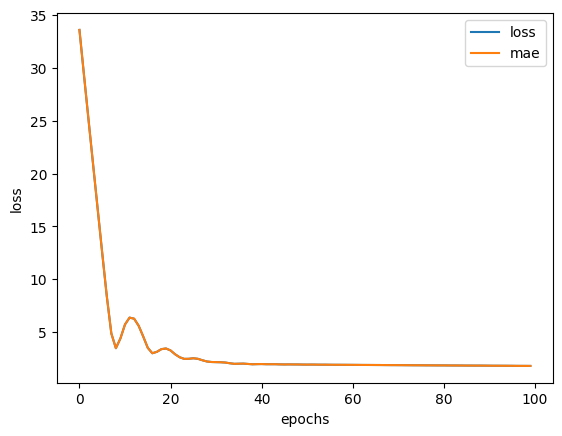

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=150,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train1, y_train1, epochs= 150, verbose=1)

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 58.4647 - mae: 58.4647
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 51.4661 - mae: 51.4661 
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.5173 - mae: 44.5173 
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37.5946 - mae: 37.5946 
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30.6900 - mae: 30.6900 
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.7965 - mae: 23.7965 
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.9064 - mae: 16.9064 
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.0472 - mae: 10.0472 
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1651 - mae: 5.1651 
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9159 - mae: 4.9159 
Epoch 11/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.5704 - mae: 7.5704 
Epoch 12/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.5507 - mae: 9.5507 
Epoch 13/150
2/2 ━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test1, y_test1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3649 - mae: 2.3649  


[2.3533477783203125, 2.3533477783203125]

In [ ]:
model.summary();

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

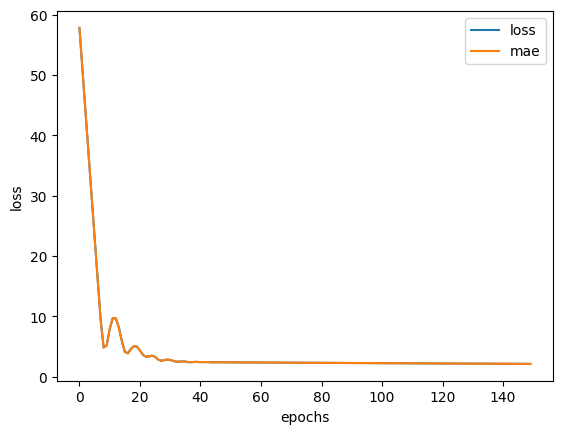

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=200 Optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train1, y_train1, epochs= 200, verbose=1)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 212.2806 - mae: 212.2806
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 203.7076 - mae: 203.7076 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 195.2513 - mae: 195.2513 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 186.9055 - mae: 186.9055 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 178.6711 - mae: 178.6711 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 170.5487 - mae: 170.5487 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 162.5387 - mae: 162.5387 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 154.6406 - mae: 154.6406 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 146.8536 - mae: 146.8536 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 139.1761 - mae: 139.1761 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 131.6056 - mae: 131.6056 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 124.1394 - mae: 124.1394 
E

In [ ]:
model.evaluate(X_test1, y_test1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5500 - mae: 1.5500  


[1.6220332384109497, 1.6220332384109497]

In [ ]:
model.summary();

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_123 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

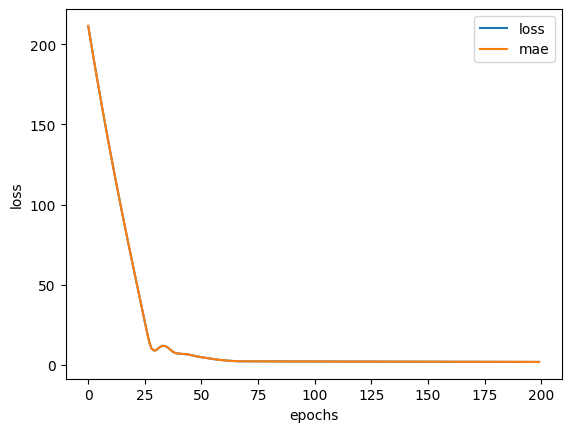

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=250,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train1, y_train1, epochs= 250, verbose=1)

Epoch 1/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 20.1685 - mae: 20.1685
Epoch 2/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.4516 - mae: 14.4516 
Epoch 3/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0867 - mae: 9.0867 
Epoch 4/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1087 - mae: 6.1087 
Epoch 5/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5865 - mae: 5.5865 
Epoch 6/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4420 - mae: 6.4420 
Epoch 7/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1872 - mae: 7.1872 
Epoch 8/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.1523 - mae: 7.1523 
Epoch 9/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.4359 - mae: 6.4359 
Epoch 10/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5617 - mae: 5.5617 
Epoch 11/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.9602 - mae: 4.9602 
Epoch 12/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8939 - mae: 4.8939 
Epoch 13/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/

In [ ]:
model.evaluate(X_test1, y_test1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0898 - mae: 2.0898  


[2.09771728515625, 2.09771728515625]

In [ ]:
model.summary();

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

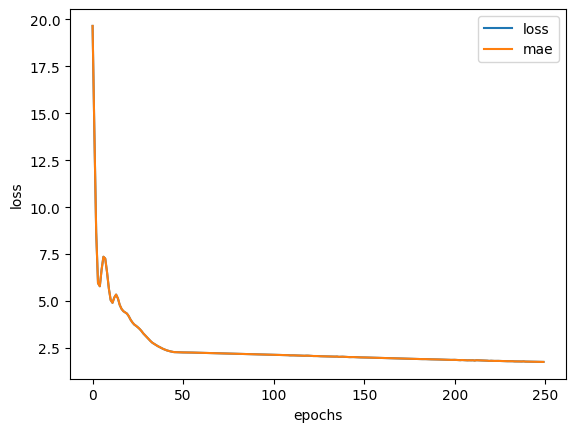

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=300,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train1, y_train1, epochs= 300, verbose=1)

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 62.6914 - mae: 62.6914
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 57.9524 - mae: 57.9524 
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 53.2623 - mae: 53.2623 
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 48.6217 - mae: 48.6217 
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.0294 - mae: 44.0294 
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39.4821 - mae: 39.4821 
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 34.9728 - mae: 34.9728 
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30.4911 - mae: 30.4911 
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26.0246 - mae: 26.0246 
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.5612 - mae: 21.5612 
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.1283 - mae: 17.1283 
Epoch 12/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.2539 - mae: 13.2539 
Epoch 13/300
2/2 ━━━━━━━━

In [ ]:
model.evaluate(X_test1, y_test1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4733 - mae: 1.4733 


[1.5018664598464966, 1.5018664598464966]

In [ ]:
model.summary();

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_129 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

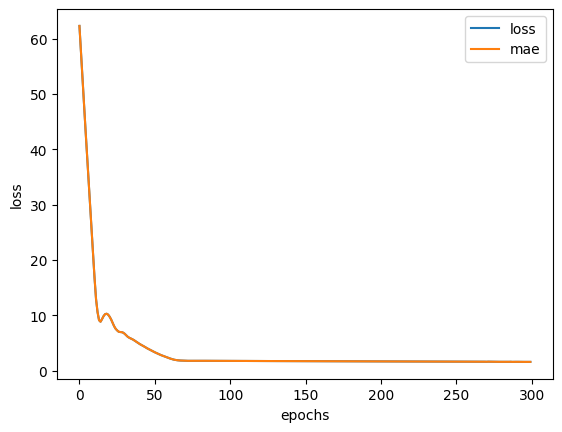

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# 70-30 Train Test Split

Epochs=100 ,optimizer=Adam



In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2, y_train2, epochs= 100, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 8.1035 - mae: 8.1035
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.3275 - mae: 7.3275 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.1359 - mae: 7.1359 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5330 - mae: 6.5330 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8781 - mae: 5.8781 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4310 - mae: 5.4310 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9693 - mae: 4.9693  
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4816 - mae: 4.4816 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1303 - mae: 4.1303 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7668 - mae: 3.7668 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2970 - mae: 3.2970 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8874 - mae: 2.8874 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

In [ ]:
model.evaluate(X_test2, y_test2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 1.5915 - mae: 1.5915


[1.5915255546569824, 1.5915255546569824]

In [ ]:
model.summary();

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_132 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

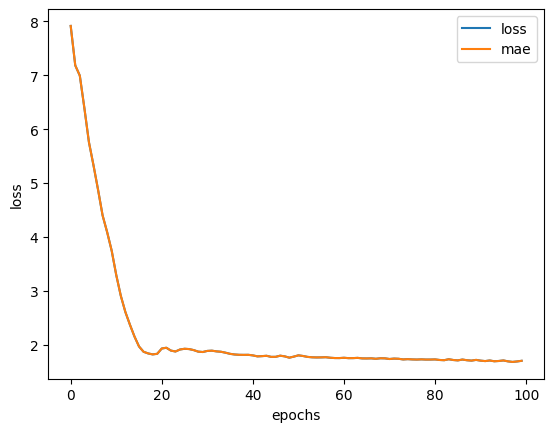

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=150,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2, y_train2, epochs= 150, verbose=1)

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 81.7088 - mae: 81.7088
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.0053 - mae: 68.0053 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.4111 - mae: 54.4111 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.3219 - mae: 42.3219 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33.0587 - mae: 33.0587 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.4496 - mae: 26.4496 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.7307 - mae: 23.7307 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.0480 - mae: 24.0480 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.3040 - mae: 24.3040 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.0431 - mae: 24.0431 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.1500 - mae: 23.1500 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.7795 - mae: 21.7795 
Epoch 13/150
3/3 ━━━━━━━━━

In [ ]:
model.evaluate(X_test2, y_test2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 2.3956 - mae: 2.3956


[2.3955726623535156, 2.3955726623535156]

In [ ]:
model.summary();

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_135 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

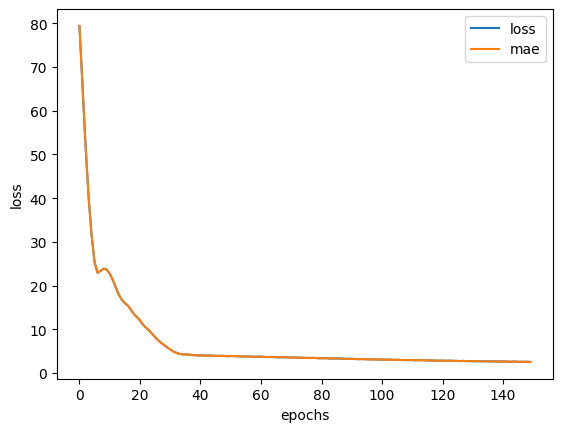

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=200,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2, y_train2, epochs= 200, verbose=1)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 210.3985 - mae: 210.3985
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 198.7213 - mae: 198.7213 
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 187.3679 - mae: 187.3679 
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 176.3479 - mae: 176.3479 
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 165.6674 - mae: 165.6674 
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 155.3280 - mae: 155.3280 
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 145.3268 - mae: 145.3268 
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 135.6554 - mae: 135.6554 
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 126.3006 - mae: 126.3006 
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 117.2455 - mae: 117.2455 
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 108.4705 - mae: 108.4705 
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 99.9552 - mae: 99.9552   
Ep

In [ ]:
model.evaluate(X_test2, y_test2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 2.3950 - mae: 2.3950


[2.395021677017212, 2.395021677017212]

In [ ]:
model.summary();

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_138 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

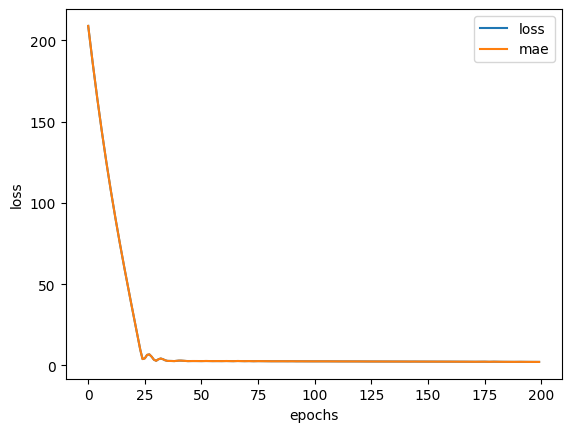

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=250,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2, y_train2, epochs= 250, verbose=1)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 139.2924 - mae: 139.2924
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 129.0082 - mae: 129.0082 
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 118.8896 - mae: 118.8896 
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 108.8990 - mae: 108.8990 
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 98.9975 - mae: 98.9975 
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 89.1617 - mae: 89.1617 
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.3697 - mae: 79.3697 
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.5952 - mae: 69.5952 
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.8092 - mae: 59.8092 
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49.9840 - mae: 49.9840 
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.0959 - mae: 40.0959 
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.1486 - mae: 30.1486 
Epoch 13/250
3/3 ━

In [ ]:
model.evaluate(X_test2, y_test2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 1.4604 - mae: 1.4604


[1.4604275226593018, 1.4604275226593018]

In [ ]:
model.summary();

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_141 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

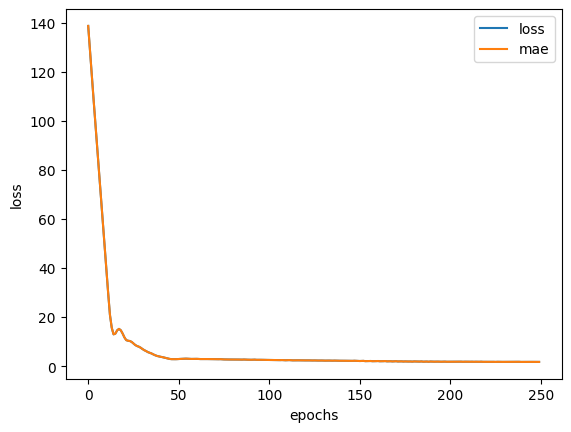

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=300,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2, y_train2, epochs= 300, verbose=1)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 104.3139 - mae: 104.3139
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94.6388 - mae: 94.6388 
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85.1691 - mae: 85.1691 
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75.8942 - mae: 75.8942 
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 66.7929 - mae: 66.7929 
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 57.8459 - mae: 57.8459 
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49.0374 - mae: 49.0374 
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.3496 - mae: 40.3496 
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.7618 - mae: 31.7618 
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.3936 - mae: 23.3936 
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.6011 - mae: 16.6011 
Epoch 12/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.5087 - mae: 12.5087 
Epoch 13/300
3/3 ━━━━━━━

In [ ]:
model.evaluate(X_test2, y_test2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 1.8380 - mae: 1.8380


[1.8380314111709595, 1.8380314111709595]

In [ ]:
model.summary();

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_144 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_145 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_146 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

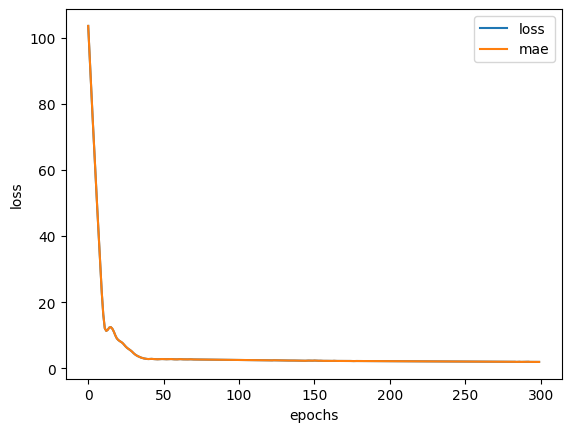

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2, y_train2, epochs= 350, verbose=1)

Epoch 1/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 56.3673 - mae: 56.3673
Epoch 2/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.1204 - mae: 46.1204 
Epoch 3/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.9690 - mae: 35.9690 
Epoch 4/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.9151 - mae: 25.9151 
Epoch 5/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.8423 - mae: 16.8423 
Epoch 6/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.8902 - mae: 12.8902 
Epoch 7/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.5121 - mae: 12.5121 
Epoch 8/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.1862 - mae: 13.1862 
Epoch 9/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.6585 - mae: 13.6585 
Epoch 10/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.6358 - mae: 13.6358 
Epoch 11/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.0836 - mae: 13.0836 
Epoch 12/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.2068 - mae: 12.2068 
Epoch 13/350
3/3 ━━━━━━━━━

In [ ]:
model.evaluate(X_test2, y_test2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 1.7662 - mae: 1.7662


[1.7661519050598145, 1.7661519050598145]

In [ ]:
model.summary();

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_147 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

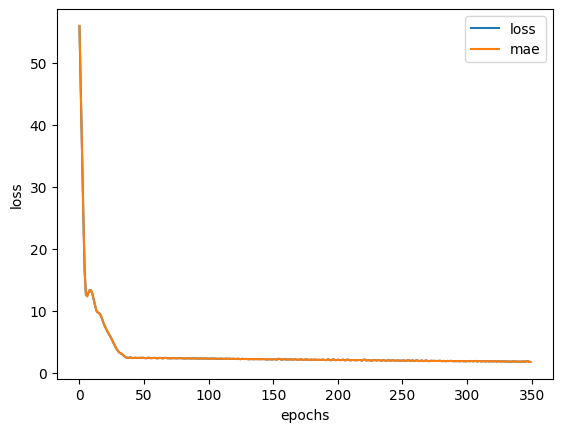

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# 75-25 Train Test Split

Epochs=100,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train3, y_train3, epochs= 100, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 257.2812 - mae: 257.2812
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 242.5283 - mae: 242.5283 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 228.0716 - mae: 228.0716  
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 213.9194 - mae: 213.9194 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 200.0776 - mae: 200.0776  
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 186.5481 - mae: 186.5481 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 173.3284 - mae: 173.3284 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 160.4112 - mae: 160.4112 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 147.7840 - mae: 147.7840 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 135.4290 - mae: 135.4290 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 123.3238 - mae: 123.3238 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 111.4422 - mae: 111.4422 

In [ ]:
model.evaluate(X_test3, y_test3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 2.9488 - mae: 2.9488


[2.948763608932495, 2.948763608932495]

In [ ]:
model.summary();

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

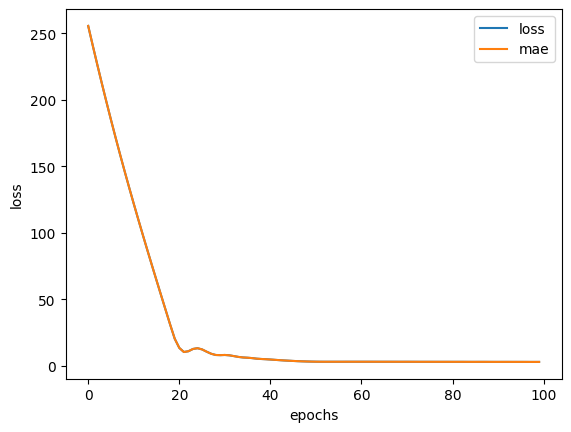

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=150,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train3, y_train3, epochs= 150, verbose=1)

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 100.2014 - mae: 100.2014
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 91.3274 - mae: 91.3274 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.5169 - mae: 82.5169 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 73.7368 - mae: 73.7368 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.9668 - mae: 64.9668 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.1828 - mae: 56.1828 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.3629 - mae: 47.3629 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.4879 - mae: 38.4879 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.5394 - mae: 29.5394 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.5558 - mae: 20.5558 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.8463 - mae: 13.8463 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.8193 - mae: 10.8193
Epoch 13/150
3/3 ━━━━━━━━

In [ ]:
model.evaluate(X_test3, y_test3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 1.3653 - mae: 1.3653


[1.365267276763916, 1.365267276763916]

In [ ]:
model.summary();

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_153 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

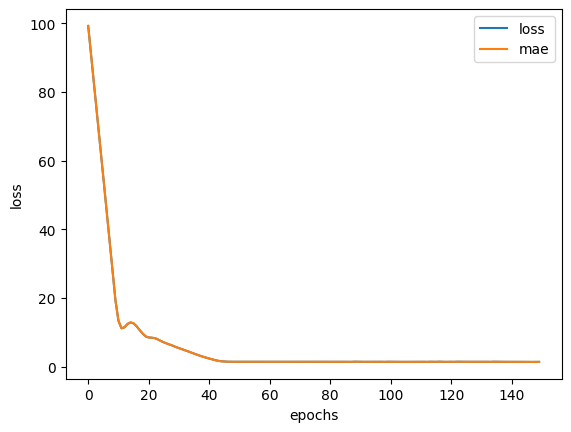

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=200,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train3, y_train3, epochs= 200, verbose=1)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 23.5848 - mae: 23.5848
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.4861 - mae: 10.4861 
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9816 - mae: 8.9816 
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.2032 - mae: 11.2032 
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.0530 - mae: 10.0530
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4339 - mae: 7.4339 
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9811 - mae: 6.9811 
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.8165 - mae: 7.8165 
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2470 - mae: 7.2470 
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8936 - mae: 5.8936 
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6903 - mae: 5.6903 
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4620 - mae: 5.4620 
Epoch 13/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

In [ ]:
model.evaluate(X_test3, y_test3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 2.4927 - mae: 2.4927


[2.4926557540893555, 2.4926557540893555]

In [ ]:
model.summary();

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_156 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

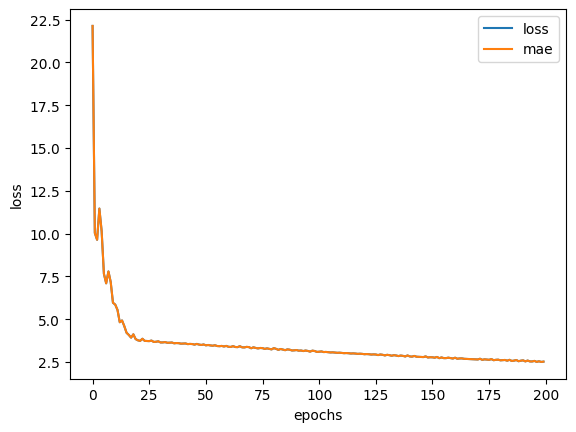

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=250,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train3, y_train3, epochs= 250, verbose=1)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 248.0736 - mae: 248.0736
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 230.0560 - mae: 230.0560 
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 212.2589 - mae: 212.2589 
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 194.6856 - mae: 194.6856 
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 177.3372 - mae: 177.3372 
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 160.2107 - mae: 160.2107 
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 143.2980 - mae: 143.2980 
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 126.5860 - mae: 126.5860 
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 110.0556 - mae: 110.0556 
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 93.6815 - mae: 93.6815 
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 77.4321 - mae: 77.4321 
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 61.2695 - mae: 61.2695 
Epoch 13

In [ ]:
model.evaluate(X_test3, y_test3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 2.7394 - mae: 2.7394


[2.7394094467163086, 2.7394094467163086]

In [ ]:
model.summary();

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_159 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

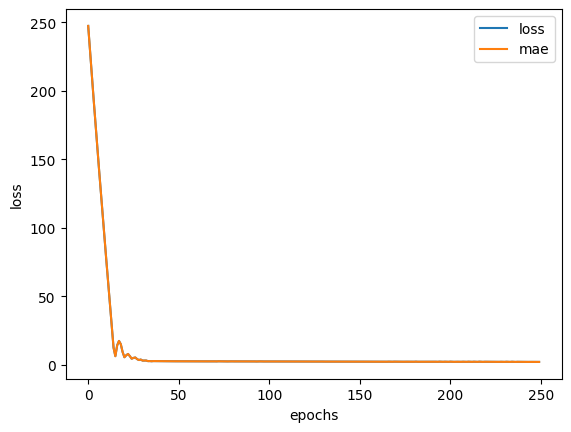

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=300,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train3, y_train3, epochs= 300, verbose=1)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 16.4044 - mae: 16.4044
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.2749 - mae: 15.2749 
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.3184 - mae: 14.3184 
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.4755 - mae: 13.4755 
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.6659 - mae: 12.6659 
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.8083 - mae: 11.8083 
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.9090 - mae: 10.9090
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.0125 - mae: 10.0125
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1459 - mae: 9.1459 
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.2919 - mae: 8.2919 
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.4512 - mae: 7.4512 
Epoch 12/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6138 - mae: 6.6138 
Epoch 13/300
3/3 ━━━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test3, y_test3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 1.3349 - mae: 1.3349


[1.3348757028579712, 1.3348757028579712]

In [ ]:
model.summary();

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_162 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

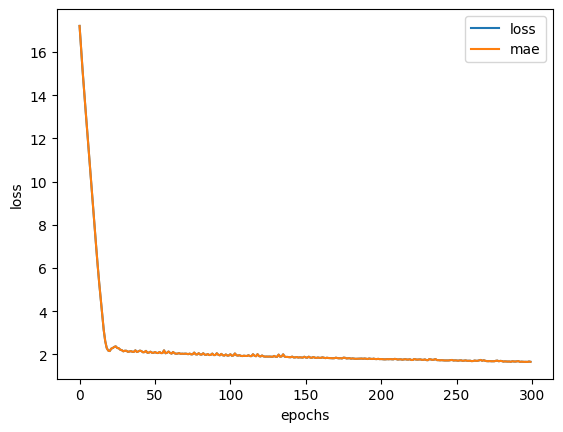

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# 80-20

Epochs=100,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train4, y_train4, epochs= 100, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.7239 - mae: 5.7239
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5726 - mae: 5.5726 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7758 - mae: 4.7758 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0439 - mae: 4.0439 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5562 - mae: 3.5562 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1166 - mae: 3.1166 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9129 - mae: 2.9129 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4601 - mae: 2.4601 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1971 - mae: 2.1971 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1489 - mae: 2.1489 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0712 - mae: 2.0712 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0550 - mae: 2.0550 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

In [ ]:
model.evaluate(X_test4, y_test4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 1.9928 - mae: 1.9928


[1.992827296257019, 1.992827296257019]

In [ ]:
model.summary();

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_165 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

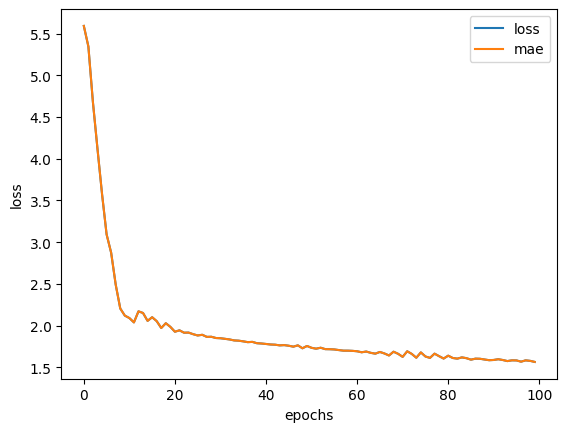

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=150,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train4, y_train4, epochs= 150, verbose=1)

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.8476 - mae: 7.8476 
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4095 - mae: 3.4095 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8810 - mae: 3.8810 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4715 - mae: 2.4715  
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.1396 - mae: 3.1396
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0761 - mae: 2.0761 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6912 - mae: 2.6912 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2959 - mae: 2.2959 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1293 - mae: 2.1293 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1828 - mae: 2.1828 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0452 - mae: 2.0452 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2107 - mae: 2.2107 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

In [ ]:
model.evaluate(X_test4, y_test4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 1.8246 - mae: 1.8246


[1.8246110677719116, 1.8246110677719116]

In [ ]:
model.summary();

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_168 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

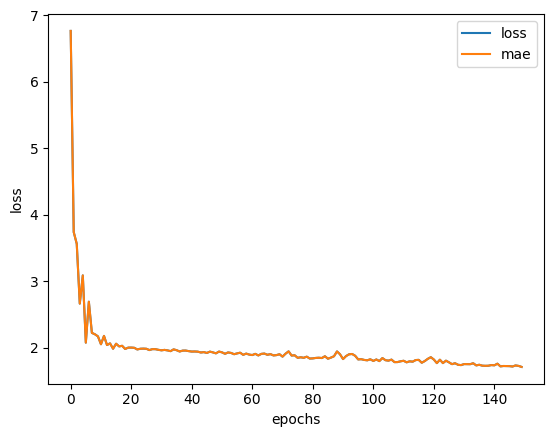

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=200,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train4, y_train4, epochs= 200, verbose=1)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 14.1133 - mae: 14.1133
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.1005 - mae: 10.1005 
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6877 - mae: 9.6877 
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3119 - mae: 9.3119 
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5140 - mae: 8.5140 
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.8836 - mae: 7.8836 
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6968 - mae: 7.6968 
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4295 - mae: 7.4295 
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5838 - mae: 6.5838 
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9849 - mae: 5.9849 
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4339 - mae: 5.4339 
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8552 - mae: 4.8552 
Epoch 13/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

In [ ]:
model.evaluate(X_test4, y_test4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 1.6174 - mae: 1.6174


[1.6174412965774536, 1.6174412965774536]

In [ ]:
model.summary();

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_171 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_172 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_173 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

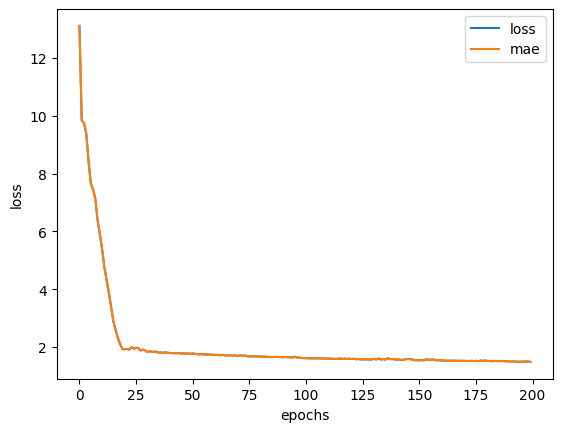

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=250,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train4, y_train4, epochs= 250, verbose=1)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 77.9824 - mae: 77.9824
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.5317 - mae: 71.5317 
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 65.1869 - mae: 65.1869 
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.9499 - mae: 58.9499 
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.8215 - mae: 52.8215 
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.8004 - mae: 46.8004 
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40.8829 - mae: 40.8829 
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.0637 - mae: 35.0637 
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.3347 - mae: 29.3347 
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.6859 - mae: 23.6859 
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.1047 - mae: 18.1047 
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.5761 - mae: 12.5761 
Epoch 13/250
3/3 ━━━━━━━━━

In [ ]:
model.evaluate(X_test4, y_test4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 1.7488 - mae: 1.7488


[1.7487751245498657, 1.7487751245498657]

In [ ]:
model.summary();

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_174 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_175 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_176 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

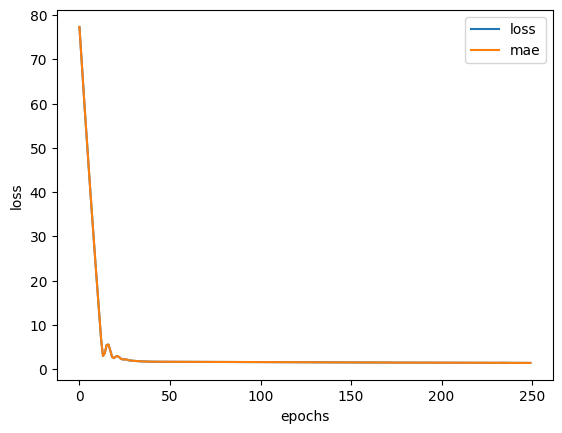

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=300,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train4, y_train4, epochs= 300, verbose=1)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 119.9270 - mae: 119.9270
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 111.3265 - mae: 111.3265 
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 102.8898 - mae: 102.8898 
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 94.6206 - mae: 94.6206 
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 86.5200 - mae: 86.5200  
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.5861 - mae: 78.5861 
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 70.8132 - mae: 70.8132 
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.1921 - mae: 63.1921 
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 55.7095 - mae: 55.7095 
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48.3486 - mae: 48.3486 
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.0902 - mae: 41.0902 
Epoch 12/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.9136 - mae: 33.9136 
Epoch 13/300
3/3 ━━

In [ ]:
model.evaluate(X_test4, y_test4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 1.5477 - mae: 1.5477


[1.547656774520874, 1.547656774520874]

In [ ]:
model.summary();

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_177 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

Text(0.5, 0, 'epochs')

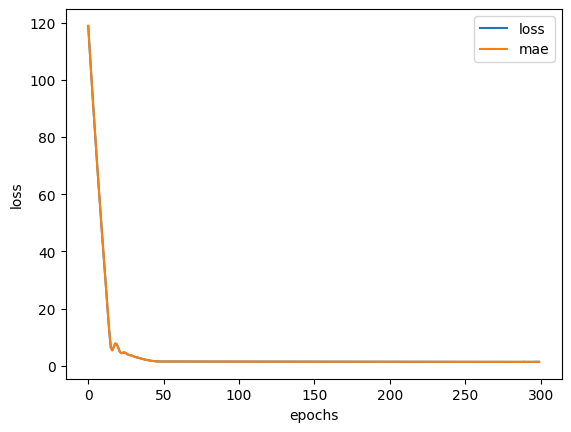

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")